In [1]:
# This is for Kaggle notebook.
# import module we'll need to import our custom module
from shutil import copytree

# copy our file into the working directory (make sure it has .py suffix)
copytree(src = "../input/myfedprox/MyFedProx/", dst = "../working/MyFedProx")

FileNotFoundError: [Errno 2] No such file or directory: '../input/myfedprox/MyFedProx/'

In [1]:
from MyFedProx.CNN import CNN
from MyFedProx.federated_learning import *
from MyFedProx.dataset_splits import *


In [2]:
import torch
from torchvision.models import mobilenet_v2
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [3]:
train_loader, test_loader = get_SIIM_ISIC("./data/jpeg/train/", "./data/train.csv", train_size=0.8, test_size=0.2, batch_size=32, device=device, total_size=8, resnet50=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


RuntimeError: a Tensor with 2 elements cannot be converted to Scalar

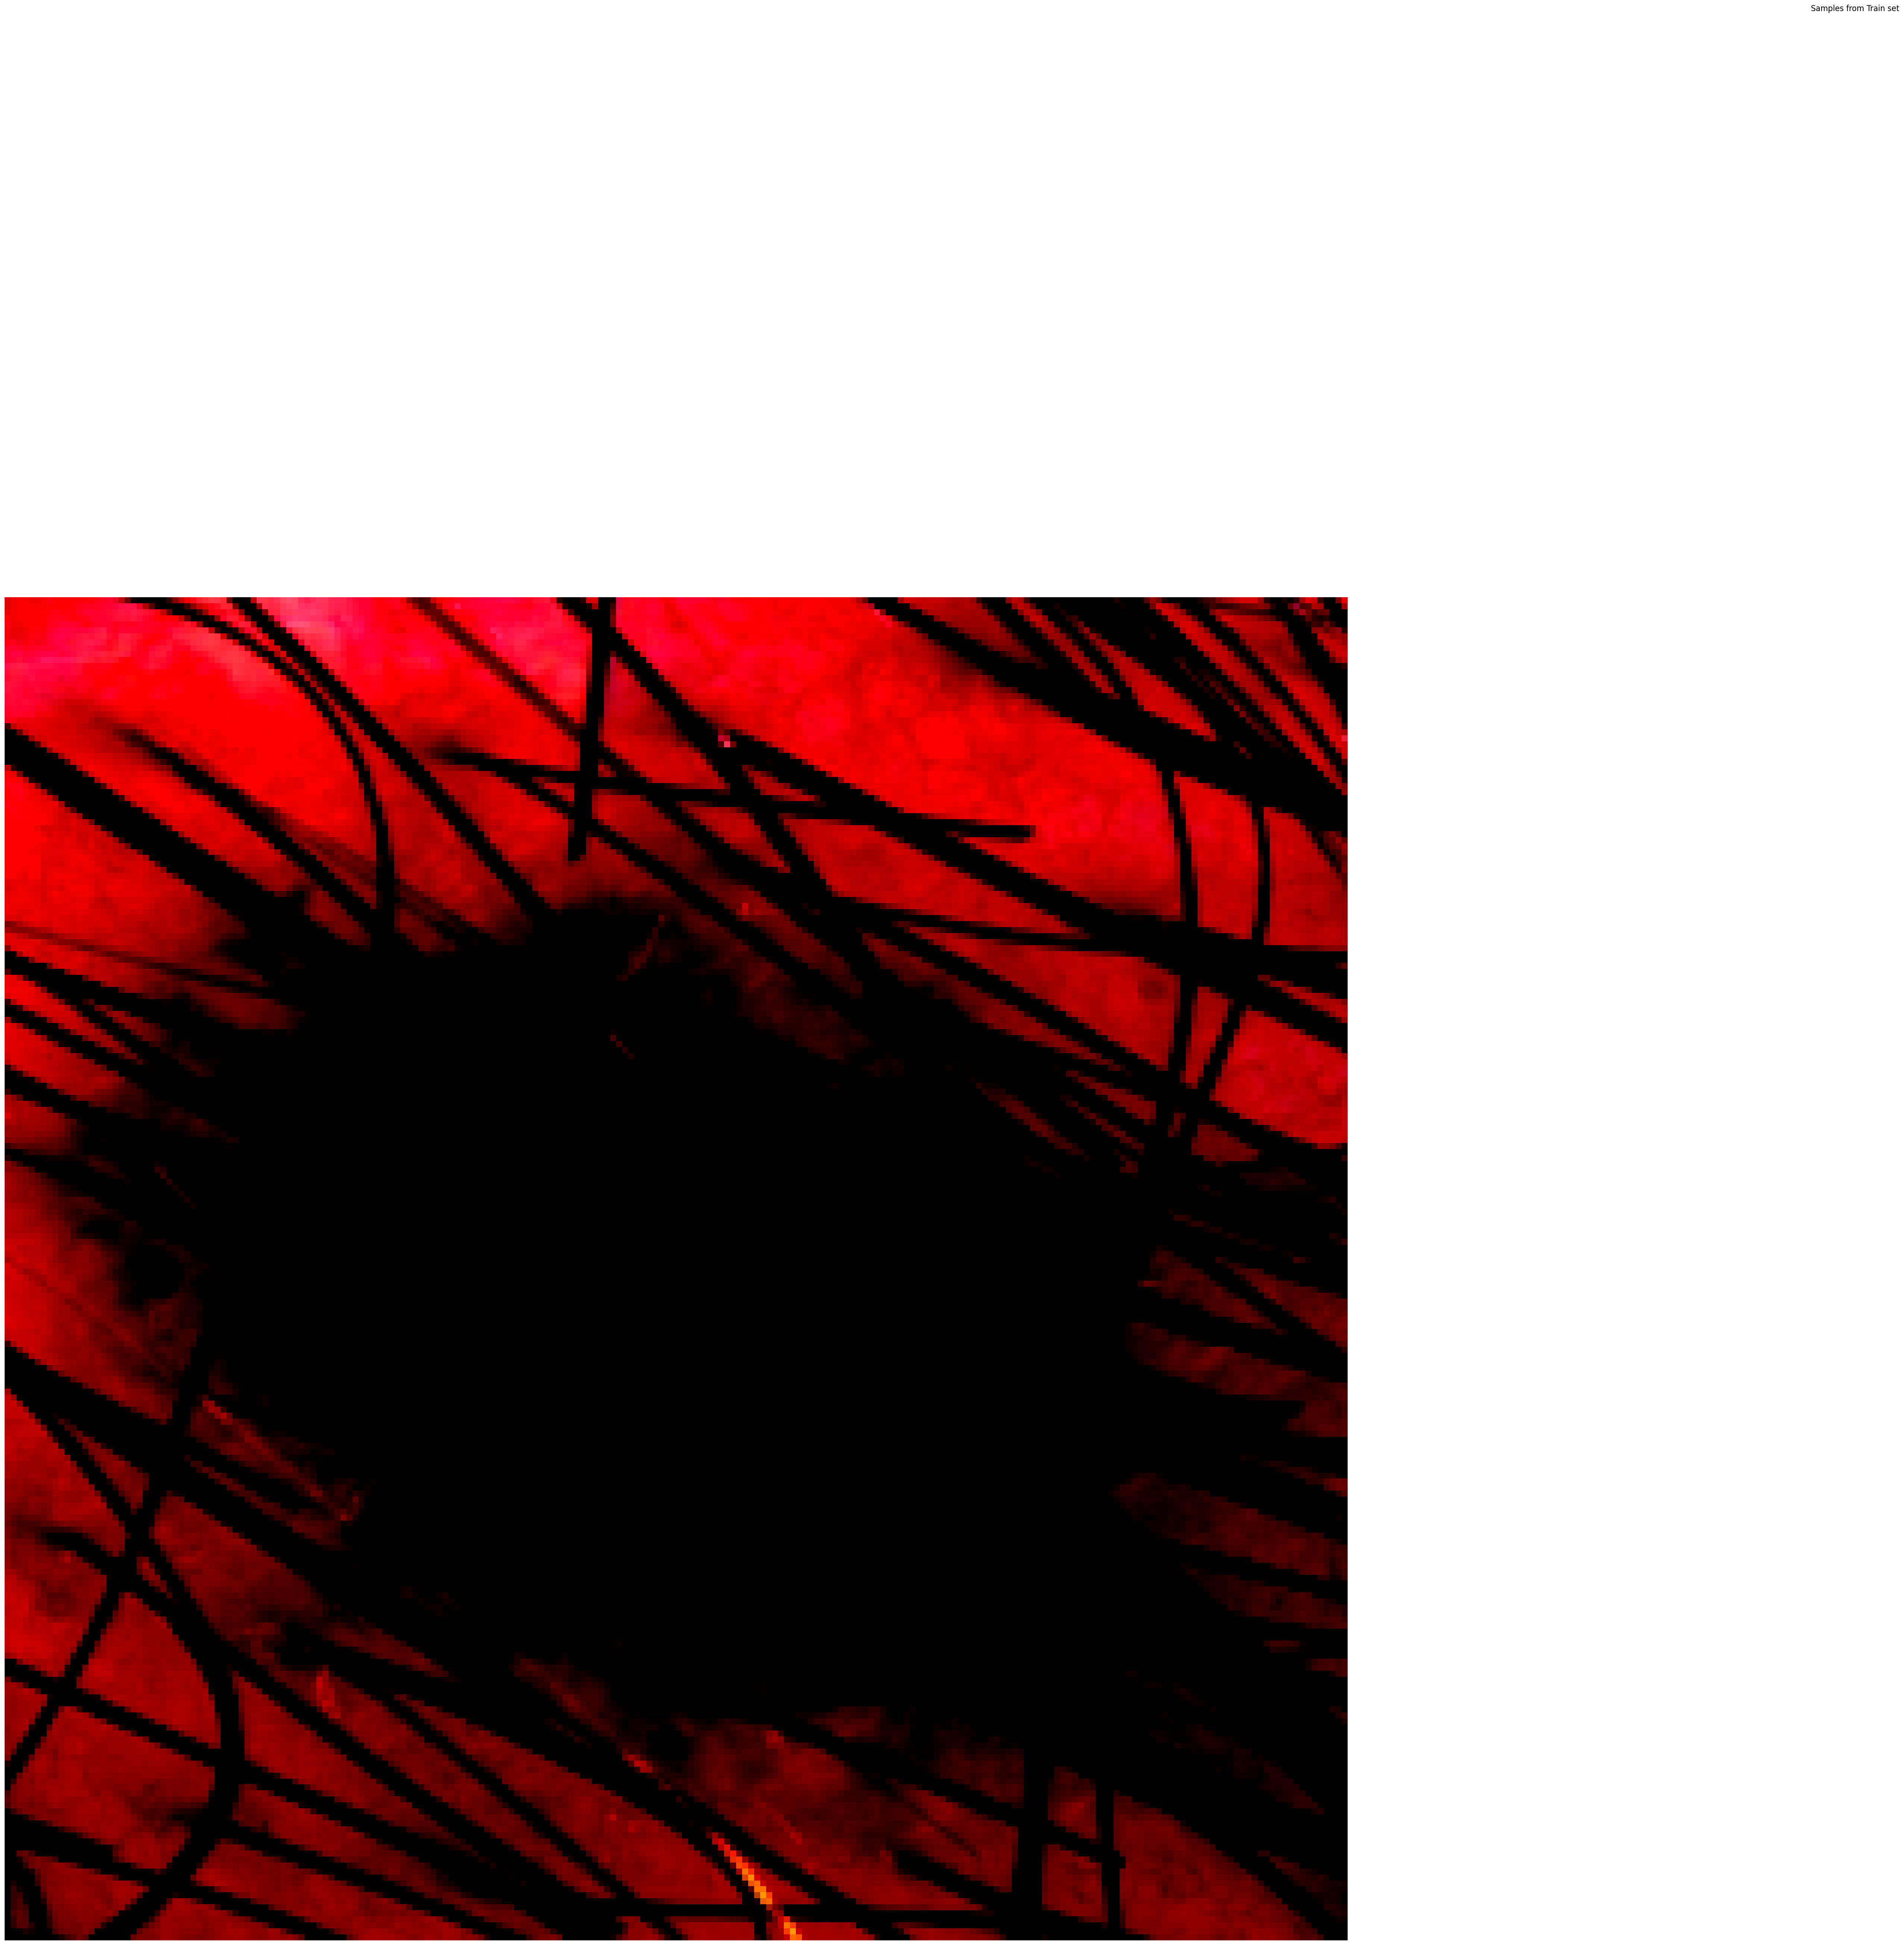

In [4]:
plot_samples(next(iter(train_loader)), "Samples from Train set", n_examples=6)

In [4]:
model = mobilenet_v2(pretrained=True).to(device)
model.classifier[1] = torch.nn.Linear(1280, 2)
for param in model.parameters():
    param.requires_grad = False

for param in model.classifier.parameters():
    param.requires_grad = True
#model = CNN().to(device)

/Users/theoripoll/.pyenv/versions/3.9.6/envs/env_MLBIO_project/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/theoripoll/.pyenv/versions/3.9.6/envs/env_MLBIO_project/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
model.eval()
batch = next(iter(train_loader))
images, labels = batch
output = model(images)
output

tensor([[ 0.1999, -0.1928],
        [ 0.0875, -0.0883],
        [ 0.4841, -0.1096],
        [ 0.0605,  0.0417],
        [ 0.6981, -0.7375],
        [ 0.1724,  0.1227],
        [ 0.1272,  0.3186]], grad_fn=<AddmmBackward0>)

In [7]:
output.shape

torch.Size([7, 2])

In [6]:
model, train_acc, test_acc, loss = classical_training(model, train_loader, test_loader, n_iter=5)

  0%|          | 0/1 [00:00<?, ?batch/s]

100%|██████████| 1/1 [00:02<00:00,  2.36s/batch]


====> i: 1 Loss: 0.6029449105262756
====> i: 1 Train Accuracy: 100.0
====> i: 1 Test Accuracy: 100.0


100%|██████████| 1/1 [00:02<00:00,  2.10s/batch]


====> i: 2 Loss: 3.9324513636529446e-06
====> i: 2 Train Accuracy: 100.0
====> i: 2 Test Accuracy: 100.0


100%|██████████| 1/1 [00:02<00:00,  2.14s/batch]


====> i: 3 Loss: 2.1036856701073248e-09
====> i: 3 Train Accuracy: 100.0
====> i: 3 Test Accuracy: 100.0


100%|██████████| 1/1 [00:02<00:00,  2.18s/batch]


====> i: 4 Loss: 4.688503491695473e-12
====> i: 4 Train Accuracy: 100.0
====> i: 4 Test Accuracy: 100.0


100%|██████████| 1/1 [00:02<00:00,  2.28s/batch]


====> i: 5 Loss: 5.638414065614779e-14
====> i: 5 Train Accuracy: 100.0
====> i: 5 Test Accuracy: 100.0


/Users/theoripoll/Documents/Epita/ING3/ML-BIO/project/ML-BIO-PROJECT/MyFedProx/federated_learning.py:273: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


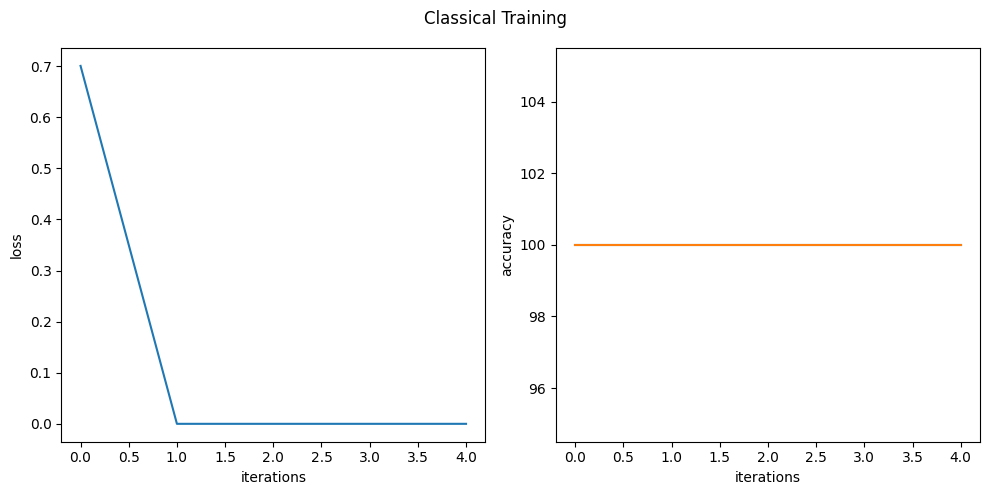

In [7]:
plot_acc_loss("Classical Training", train_acc, test_acc, loss)